In [2]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest

from matplotlib import pyplot as plt
df=pd.read_csv('sample.csv')

In [13]:
stats, p = normaltest(df)

/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1086: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1090: RuntimeWarning: overflow encountered in square
  s = s**2
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [14]:
p#does that no feature is gaussian-distributed?

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

(array([  11239., 1407281., 3629398., 3540832., 2293327., 1307802.,
         659184.,  301547.,  131717.,   54061.]),
 array([-1.000e+00,  9.960e+01,  2.002e+02,  3.008e+02,  4.014e+02,
         5.020e+02,  6.026e+02,  7.032e+02,  8.038e+02,  9.044e+02,
         1.005e+03]),
 <BarContainer object of 10 artists>)

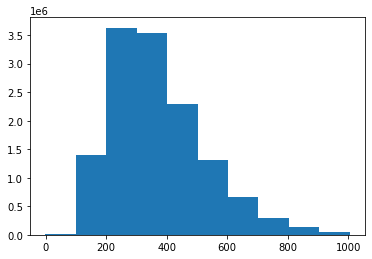

In [17]:
plt.hist(df['SPEFit2BayesianFitParams.nmini'])#just a random feature but it has somewhat of a bell-shape

In [21]:
from scipy.stats import anderson #just another attempt to look at the data
anderson_results=anderson(df, dist='norm')#I am probably using it wrong
print(anderson_results)

/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/pandas/core/nanops.py:791: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


ValueError: Length of passed values is 13336388, index implies 79.